In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
penguins = pd.read_csv('https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv')
df = penguins
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
idx = df.loc[df['sex'].isna()].index
df = df.drop(idx)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [ ]:
df['species']=df['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})
df['island']=df['island'].map({'Biscoe':0,'Dream':1,'Torgersen':2})
df['sex']=df['sex'].map({'MALE':0,'FEMALE':1})

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,0
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,0


In [ ]:
df['island'].value_counts()

0    163
1    123
2     47
Name: island, dtype: int64

In [ ]:
X=df.drop('species',axis=1)
y=df['species']

In [ ]:
X.shape,y.shape

((333, 6), (333,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                test_size=0.2,
                shuffle=True,
                 random_state=2022,
                 stratify=y)
X_train.shape,X_test.shape

((266, 6), (67, 6))

In [ ]:
y_train.value_counts()

0    117
1     95
2     54
Name: species, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = y_train.values

In [ ]:
from tensorflow.keras.utils import to_categorical # 원-핫인코더
y_train_oh = to_categorical(y_train)
y_train_oh

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [ ]:
y_train_oh

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [ ]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(6,)),
    layers.Dense(32,activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                448       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,627
Trainable params: 2,627
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 200
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2,
                    verbose=1
                    )

Epoch 1/200
7/7 [==============================] - 1s 46ms/step - loss: 1.0435 - acc: 0.4057 - val_loss: 0.8712 - val_acc: 0.7037
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 0.8388 - acc: 0.8066 - val_loss: 0.6931 - val_acc: 0.9259
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6783 - acc: 0.9434 - val_loss: 0.5418 - val_acc: 0.9444
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5496 - acc: 0.9340 - val_loss: 0.4190 - val_acc: 0.9444
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4444 - acc: 0.9481 - val_loss: 0.3282 - val_acc: 0.9444
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 0.3625 - acc: 0.9528 - val_loss: 0.2603 - val_acc: 0.9630
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.2939 - acc: 0.9623 - val_loss: 0.2100 - val_acc: 0.9630
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2367 - acc: 0.9717 - va

In [ ]:
## 시각화

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

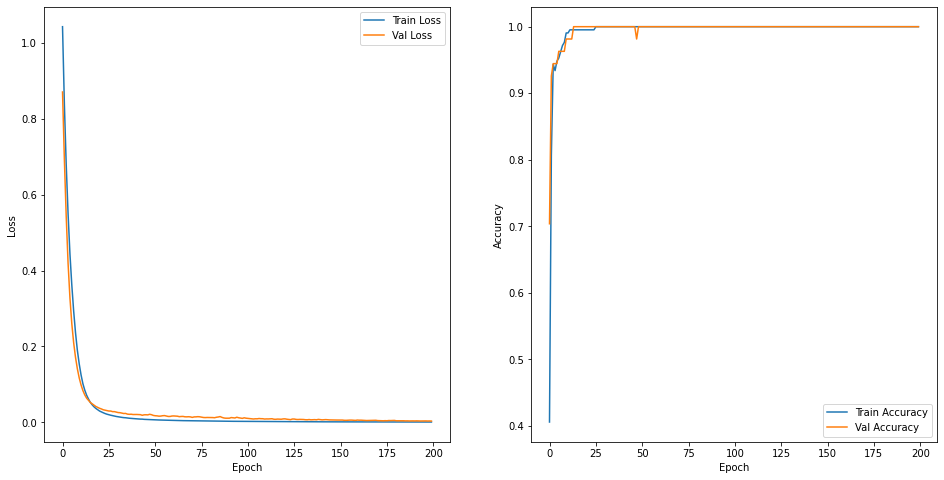

In [ ]:
plot_history(history)


In [ ]:
# 평가
model.evaluate(X_train, y_train_oh)

9/9 [==============================] - 0s 5ms/step - loss: 0.0011 - acc: 1.0000


[0.001123401103541255, 1.0]

In [ ]:
X_test_s = scaler.transform(X_test)
y_test_oh = to_categorical(y_test)

In [ ]:
model.evaluate(X_test_s, y_test_oh)

3/3 [==============================] - 0s 11ms/step - loss: 0.0010 - acc: 1.0000


[0.0010214782087132335, 1.0]

In [ ]:
# 예측
y_pred = model.predict(X_test_s)
y_pred

3/3 [==============================] - 0s 6ms/step


array([[9.99999940e-01, 3.86098833e-08, 8.07369865e-11],
       [5.62829518e-06, 9.99988258e-01, 6.06059484e-06],
       [2.02259216e-05, 4.87543984e-05, 9.99930918e-01],
       [9.99999940e-01, 2.72390697e-08, 4.11565679e-08],
       [1.68156439e-05, 9.99971688e-01, 1.14509030e-05],
       [1.60317725e-07, 9.99922216e-01, 7.76422748e-05],
       [8.60785512e-05, 9.99900043e-01, 1.38750556e-05],
       [1.52469647e-05, 9.99977291e-01, 7.44455883e-06],
       [9.99999940e-01, 2.66170108e-08, 4.01753510e-08],
       [7.19151240e-06, 7.61395540e-06, 9.99985158e-01],
       [2.16858862e-05, 9.99965370e-01, 1.29192467e-05],
       [9.99615729e-01, 1.40354350e-05, 3.70210531e-04],
       [2.80719432e-05, 1.04263663e-05, 9.99961436e-01],
       [8.15211024e-06, 1.39535211e-06, 9.99990404e-01],
       [9.99999821e-01, 9.04580091e-08, 7.41027595e-09],
       [3.02833178e-05, 2.85228962e-05, 9.99941170e-01],
       [1.17035852e-04, 7.14954831e-06, 9.99875784e-01],
       [9.97722685e-01, 1.69220

In [ ]:
y_test.values

array([0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1,
       0])

In [ ]:
# 가장큰 값의 인덱스를 반환한다.
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1,
       0])

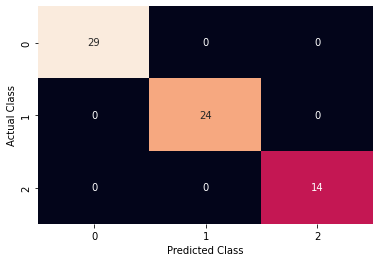

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cbar=False)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()